In [3]:
import sys
import importlib

import numpy as np
import pandas as pd
import xarray as xr
import pvlib as pv
import matplotlib.pyplot as plt

In [39]:
%matplotlib inline

In [5]:
sys.path.append('/home/travis/python_code/letkf_forecasting/')
import letkf_forecasting as lf

In [15]:
importlib.reload(lf)

<module 'letkf_forecasting' from '/home/travis/python_code/letkf_forecasting/letkf_forecasting.py'>

In [6]:
#for Golem
sat_14 = xr.open_dataset('/home/travis/python_code/forecasting/current_data/sat_14.nc')
sat_15 = xr.open_dataset('/home/travis/python_code/forecasting/current_data/sat_15.nc')
wind_15 = xr.open_dataset('/home/travis/python_code/forecasting/current_data/wind_15_crop.nc')
sensor_data = pd.read_hdf('/home/travis/python_code/forecasting/current_data/sensor_data.h5')
sensor_loc = pd.read_hdf('/home/travis/python_code/forecasting/current_data/sensor_loc.h5')

In [7]:
clear_sky_good = xr.DataArray(
    data=sat_15.GHI.values/sat_14.GHI.values,
    coords=sat_15.coords)

sat_15['clear_sky_good'] = clear_sky_good

In [8]:
sensor_CI = sensor_data[['clearsky_index', 'id']]
sensor_CI = sensor_CI.reset_index().pivot(
    index='time', columns='id', values='clearsky_index')
sensor_CI = sensor_CI.resample('5min').mean().dropna()

In [111]:
#This is taken from http://www.groundcontrol.com/Satellite_Look_Angle_Calculator.html
goes15_azimuth = 220.5*(2*np.pi)/360
goes15_elevation = 44.1*(2*np.pi)/360

time = pd.Timestamp('2014-04-15 11:00:00').tz_localize('MST')
tus = pv.location.Location(32.2, -111, 'US/Arizona', 700,'Tucson')
solar_position = tus.get_solarposition(time)
lf.parallax_shift(2000,
                     goes15_azimuth,
                     goes15_elevation,
                     solar_position['azimuth'].values*np.pi/360,
                     solar_position['elevation'].values*np.pi/360)

(array([ 4502.7974688]), array([ 2902.55179225]))

In [117]:
np.concatenate()

TypeError: Required argument 'seq' (pos 1) not found

0.128841033073
0.141716691354


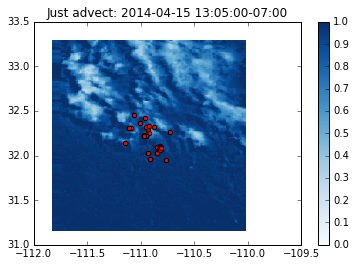

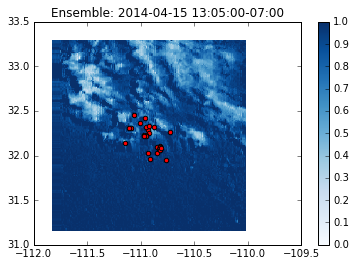

0.231128986527
0.198076304625


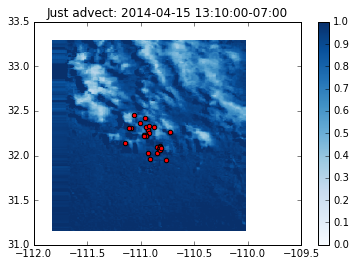

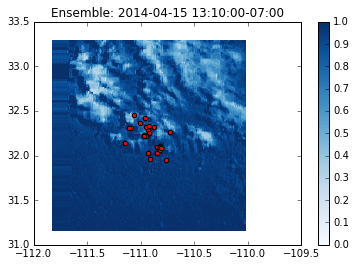

Starting Full image
nan


LinAlgError: Eigenvalues did not converge

/home/travis/miniconda3/envs/py35Solar/lib/python3.5/site-packages/matplotlib/colors.py:581: RuntimeWarning: invalid value encountered in less
  cbook._putmask(xa, xa < 0.0, -1)


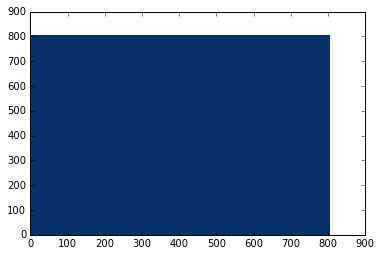

In [127]:
importlib.reload(lf)
dx = 250 #in km
dy = 250 #in km
C_max = 1.2
assimilation_grid_size = 100
localization = 30

sat_sig = .3
sensor_sig = .1
ens_size = 10
wind_sigma = (.4, .05)
wind_size = 2

start_time = '2014-04-15 13:00:00' #11:00:00 is not a bad start
end_time = '2014-04-15 13:30:00' #Gets boring shortly after 14:00:00

lf.simulation(sat_15, wind_15, sensor_CI, sensor_loc,
              start_time, end_time, dx, dy, C_max,
              assimilation_grid_size, localization,
              sat_sig, sensor_sig, ens_size, wind_sigma, wind_size)